In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import math

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 5)
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv('./resultados.txt',sep='\t', encoding='latin-1')

In [3]:
# Remove the number of the question in the column name with regex and trim the spaces
df = df.rename(columns=lambda x: re.sub(r'\d+.', '', x).strip())
# Remove the line break in the column name
df = df.rename(columns=lambda x: x.replace('\n', ' '))
#  replace "Parte"
df = df.rename(columns=lambda x: x.replace('Parte', ''))
# Eliminar columnas vacias
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
# Eliminar marca de tiempo
df = df.drop(columns=['Marca temporal'])
# Replace "No" with 0 and "Si" with 1
df = df.replace({'Si': 'Sí'})

In [4]:
df.columns

Index(['   Género', 'Edad:',
       'Año actual cursando en la carrera de Ingeniería en Sistemas:',
       '¿Trabaja o ha trabajado en un área relacionada con la ingeniería en sistemas?',
       'En qué área de ingeniería en sistemas trabaja actualmente.',
       'Cuánto tiempo ha trabajado en esta área',
       'La organización en la que ha trabajado o está trabajando es:',
       'Cuál es su rango salarial actual',
       'De continuar en su área cuánto espera ser su próximo rango salarial.',
       'Planea continuar especializándose en su área.',
       'Los rangos salariales de esta otra especialidad son un motivador para cambiar de área de especialización',
       'En qué otras área planea especializarse.',
       '¿Ha seleccionado ya su especialidad dentro de la Ingeniería en Sistemas?',
       'Ha seleccionado su especialidad, indique cual es', 'Amigos',
       'Familiares', 'Relaciones Sociales', 'Entorno Laboral',
       'Compañeros de la carrera', 'Maestros', 'Alguna persona 

In [5]:
# rename the columns
new_column_names = [
    'Genero', 
    'Edad', 
    'Ano_actual_cursando_carrera_Ing_Sistemas', 
    'Trabaja_o_ha_trabajado_en_ingenieria_en_sistemas', 
    'Area_de_ingenieria_en_sistemas_actual', 
    'Tiempo_de_trabajo_en_area_actual', 
    'Organizacion_trabajo_actual', 
    'Rango_salarial_actual', 
    'Proximo_rango_salarial_esperado', 
    'Planea_continuar_especializandose', 
    'Motivacion_por_rangos_salariales_en_otra_especialidad', 
    'Otras_areas_de_especializacion', 
    'Especialidad_seleccionada_dentro_de_Ing_Sistemas', 
    'Especialidad_seleccionada', 
    'Amigos', 
    'Familiares', 
    'Relaciones_Sociales', 
    'Entorno_Laboral', 
    'Companeros_de_la_carrera', 
    'Maestros', 
    'Persona_en_internet', 
    'Situacion_financiera_actual', 
    'Expectativa_mejor_situacion_financiera', 
    'Salarios_area_especializacion', 
    'Costos_estudios_en_area_especializacion', 
    'Factores_influyentes_en_decision', 
    'Oportunidades_laborales_en_decision', 
    'Expectativas_salariales_en_decision'
]

df.columns = new_column_names

In [6]:
# Los que si trabajan
trabajadores = df[df['Trabaja_o_ha_trabajado_en_ingenieria_en_sistemas'] == 'Sí']
# Los que no trabajan
estudiantes = df[df['Trabaja_o_ha_trabajado_en_ingenieria_en_sistemas'] == 'No']

In [7]:
trabajadores

,Genero,Edad,Ano_actual_cursando_carrera_Ing_Sistemas,Trabaja_o_ha_trabajado_en_ingenieria_en_sistemas,Area_de_ingenieria_en_sistemas_actual,Tiempo_de_trabajo_en_area_actual,Organizacion_trabajo_actual,Rango_salarial_actual,Proximo_rango_salarial_esperado,Planea_continuar_especializandose,Motivacion_por_rangos_salariales_en_otra_especialidad,Otras_areas_de_especializacion,Especialidad_seleccionada_dentro_de_Ing_Sistemas,Especialidad_seleccionada,Amigos,Familiares,Relaciones_Sociales,Entorno_Laboral,Companeros_de_la_carrera,Maestros,Persona_en_internet,Situacion_financiera_actual,Expectativa_mejor_situacion_financiera,Salarios_area_especializacion,Costos_estudios_en_area_especializacion,Factores_influyentes_en_decision,Oportunidades_laborales_en_decision,Expectativas_salariales_en_decision
0,Hombre,Mayor de 25 años,Cuarto año,Sí,Soporte tecnico,1 año a 3 años,Privada,"Menos L15,000","L25,000-L35,000",Sí,Sí,"Infraestructura, Ciberseguridad, Redes, Admini...",No,NaN,1,2,2,3,1,1,1,4,5,5,2,"Oportunidades laborales, Perspectivas futuras ...",Sí,Sí
2,Hombre,22-25 años,Quinto año,Sí,Desarrollo Backend,6 meses a 1 año,Privada,"L15,000-L25,000","L25,000-L35,000",Sí,No,"Ciberseguridad, Desarrollo Backend",Sí,Ciberseguridad,2,2,2,2,2,4,4,5,5,5,5,"Oportunidades laborales, Perspectivas futuras ...",Sí,Sí
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,Hombre,22-25 años,Quinto año,Sí,Desarrollo Backend,1 año a 3 años,Privada,"L15,000-L25,000","L45,000-L60,000",Sí,Sí,"Quality Assurance, Infraestructura, Analista d...",No,NaN,3,3,3,3,3,3,3,3,3,3,3,"Gusto o interés personal, Aptitudes y habilida...",Sí,Sí
53,Hombre,20-22 años,Quinto año,Sí,Ciberseguridad,Menos de 6 meses,Privada,"Menos L15,000","L25,000-L35,000",Sí,Sí,"Project Management, Infraestructura, Desarroll...",No,NaN,1,1,1,3,1,3,1,1,5,5,5,"Oportunidades laborales, Perspectivas futuras ...",Sí,Sí


In [8]:
trabajadores.describe()

,Amigos,Familiares,Relaciones_Sociales,Entorno_Laboral,Companeros_de_la_carrera,Maestros,Persona_en_internet,Situacion_financiera_actual,Expectativa_mejor_situacion_financiera,Salarios_area_especializacion,Costos_estudios_en_area_especializacion
count,32.0,32.0000,32.0,32.00000,32.0000,32.00000,32.00,32.00000,32.0000,32.00000,32.0000
mean,2.0,1.8125,2.5,3.78125,2.5625,2.78125,2.25,3.53125,4.1875,4.03125,3.5625
...,...,...,...,...,...,...,...,...,...,...,...
75%,3.0,2.2500,4.0,4.25000,4.0000,4.00000,3.25,4.00000,5.0000,5.00000,5.0000
max,4.0,5.0000,5.0,5.00000,5.0000,5.00000,5.00,5.00000,5.0000,5.00000,5.0000


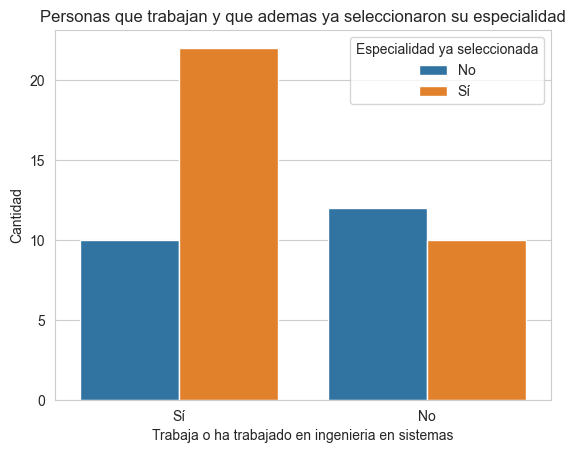

In [9]:
# personas que trabajan y que ademas ya seleccionaron su especialidad
ax = sns.countplot(x='Trabaja_o_ha_trabajado_en_ingenieria_en_sistemas', hue='Especialidad_seleccionada_dentro_de_Ing_Sistemas', data=df )
ax.set_title('Personas que trabajan y que ademas ya seleccionaron su especialidad')
ax.set_xlabel('Trabaja o ha trabajado en ingenieria en sistemas')
ax.set_ylabel('Cantidad')
ax.legend(title='Especialidad ya seleccionada', loc='upper right')

Text(0.5, 1.0, 'Genero')

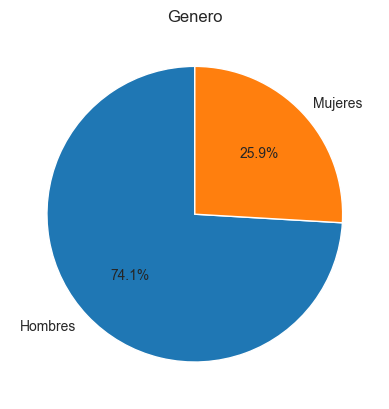

In [10]:
# Genero
ax = plt.pie(df['Genero'].value_counts(), labels=['Hombres', 'Mujeres'], autopct='%1.1f%%', startangle=90)
plt.title('Genero')

Text(0.5, 1.0, 'Año en el que se encuentra cursando la carrera de Ingenieria en Sistemas')

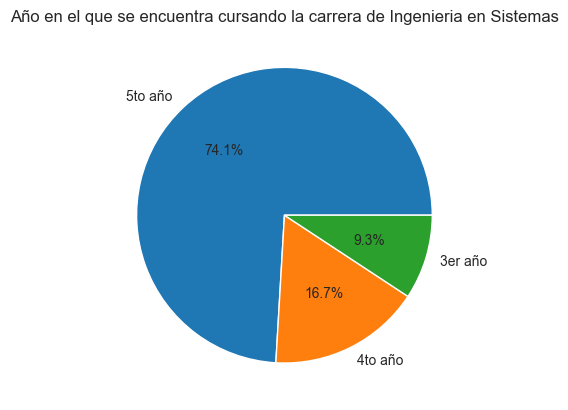

In [11]:
# Ano_actual_cursando_carrera_Ing_Sistemas
ax = plt.pie(df['Ano_actual_cursando_carrera_Ing_Sistemas'].value_counts(), labels=['5to año', '4to año', '3er año'], autopct='%1.1f%%')
plt.title('Año en el que se encuentra cursando la carrera de Ingenieria en Sistemas')

In [12]:
# Porcentajes de personas que trabajan y que no que ya seleccionaron su especialidad y que no
# Trabajan
trabajadores_si = trabajadores[trabajadores['Especialidad_seleccionada_dentro_de_Ing_Sistemas'] == 'Sí']
trabajadores_no = trabajadores[trabajadores['Especialidad_seleccionada_dentro_de_Ing_Sistemas'] == 'No']
# Estudiantes
estudiantes_si = estudiantes[estudiantes['Especialidad_seleccionada_dentro_de_Ing_Sistemas'] == 'Sí']
estudiantes_no = estudiantes[estudiantes['Especialidad_seleccionada_dentro_de_Ing_Sistemas'] == 'No']

total = len(df)
# Trabajadores
total_trabajadores = len(trabajadores)
total_trabajadores_si = len(trabajadores_si)
total_trabajadores_no = len(trabajadores_no)
# Estudiantes
total_estudiantes = len(estudiantes)
total_estudiantes_si = len(estudiantes_si)
total_estudiantes_no = len(estudiantes_no)

# Trabajadores
porcentaje_trabajadores_si = (total_trabajadores_si / total) * 100
porcentaje_trabajadores_no = (total_trabajadores_no / total) * 100
# Estudiantes
porcentaje_estudiantes_si = (total_estudiantes_si / total) * 100
porcentaje_estudiantes_no = (total_estudiantes_no / total) * 100

# Porcentajes redondeados a 2 decimales
print('Porcentaje de personas que trabajan y que ya seleccionaron su especialidad: ' + str(round(porcentaje_trabajadores_si, 2)) + '%')
print('Porcentaje de personas que trabajan y que no seleccionaron su especialidad: ' + str(round(porcentaje_trabajadores_no, 2)) + '%')
print('Porcentaje de personas que no trabajan y que ya seleccionaron su especialidad: ' + str(round(porcentaje_estudiantes_si, 2)) + '%')
print('Porcentaje de personas que no trabajan y que no seleccionaron su especialidad: ' + str(round(porcentaje_estudiantes_no, 2)) + '%')

Porcentaje de personas que trabajan y que ya seleccionaron su especialidad: 40.74%
Porcentaje de personas que trabajan y que no seleccionaron su especialidad: 18.52%
Porcentaje de personas que no trabajan y que ya seleccionaron su especialidad: 18.52%
Porcentaje de personas que no trabajan y que no seleccionaron su especialidad: 22.22%


Text(0.5, 1.0, 'Porcentajes de estudiantes y trabajadores que ya seleccionaron su especialidad')

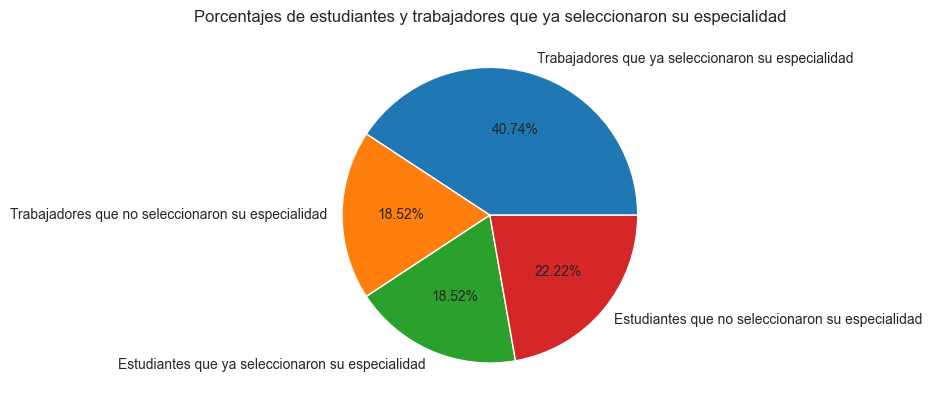

In [13]:
ax = plt.pie([porcentaje_trabajadores_si, porcentaje_trabajadores_no, porcentaje_estudiantes_si, porcentaje_estudiantes_no], labels=['Trabajadores que ya seleccionaron su especialidad', 'Trabajadores que no seleccionaron su especialidad', 'Estudiantes que ya seleccionaron su especialidad', 'Estudiantes que no seleccionaron su especialidad'], autopct='%1.2f%%')
plt.title('Porcentajes de estudiantes y trabajadores que ya seleccionaron su especialidad')

In [14]:
# Primero separar todas las multiples opciones y contarlas en los Factores_influyentes_en_decision 
options = []
for index, row in df.iterrows():
    if type(row['Factores_influyentes_en_decision']) == str:
        options.extend(row['Factores_influyentes_en_decision'].split(','))
options = list(map(lambda x: x.strip(), options))
options = list(set(options))
options = list(filter(lambda x: x != '', options))

In [15]:
# Segundo contar las opciones en los Factores_influyentes_en_decision
options_count = {}
for option in options:
    options_count[option] = 0
for index, row in df.iterrows():
    if type(row['Factores_influyentes_en_decision']) == str:
        for option in options:
            if option in row['Factores_influyentes_en_decision']:
                options_count[option] += 1
options_count

{'Gusto o interés personal': 43,
 'Perspectivas futuras en el campo': 35,
 'Recomendaciones de profesores o mentores': 5,
 'Oportunidades laborales': 46,
 'Aptitudes y habilidades específicas': 31}

[Text(0, 0, 'Gusto o interés personal'),
 Text(1, 0, 'Perspectivas futuras en el campo'),
 Text(2, 0, 'Recomendaciones de profesores o mentores'),
 Text(3, 0, 'Oportunidades laborales'),
 Text(4, 0, 'Aptitudes y habilidades específicas')]

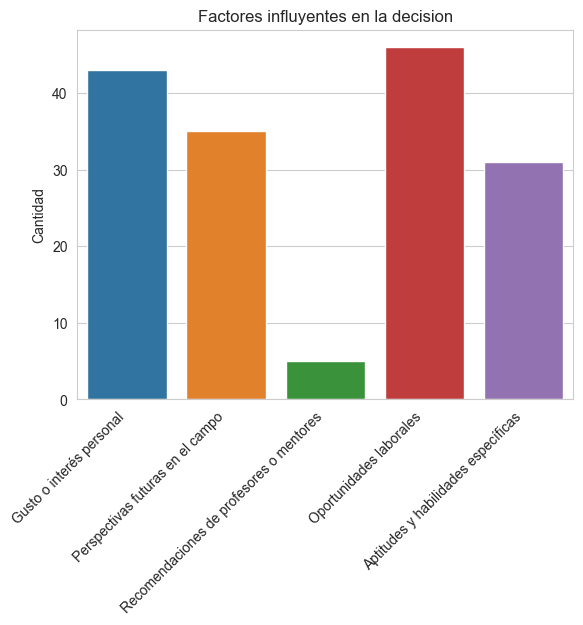

In [16]:
# Crear un grafico de barras con los resultados ordenados
ax = sns.barplot(x=list(options_count.keys()), y=list(options_count.values()))
ax.set_title('Factores influyentes en la decision')
ax.set_ylabel('Cantidad')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

Text(0.5, 1.0, 'Oportunidades laborales como influyente en la decision')

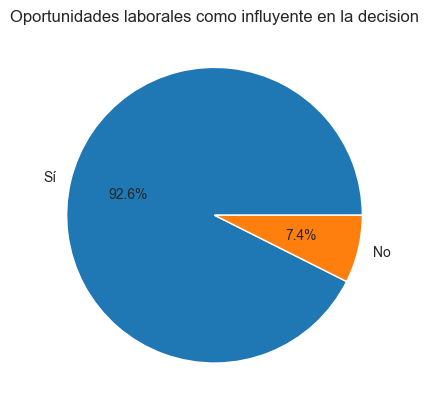

In [17]:
ax = plt.pie(df['Oportunidades_laborales_en_decision'].value_counts(), labels=['Sí', 'No'], autopct='%1.1f%%')
plt.title('Oportunidades laborales como influyente en la decision')

Text(0.5, 1.0, 'Expectativas salariales como influyente en la decision')

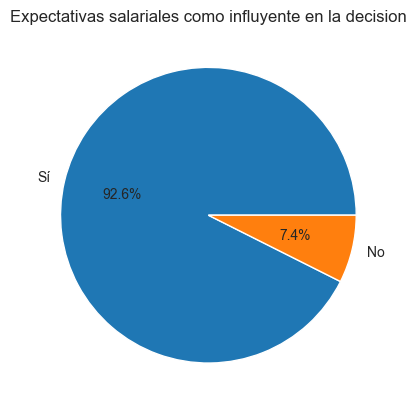

In [18]:
ax = plt.pie(df['Expectativas_salariales_en_decision'].value_counts(), labels=['Sí', 'No'], autopct='%1.1f%%')
plt.title('Expectativas salariales como influyente en la decision')

[Text(0, 0, 'Amigos'),
 Text(1, 0, 'Familiares'),
 Text(2, 0, 'Relaciones_Sociales'),
 Text(3, 0, 'Entorno_Laboral'),
 Text(4, 0, 'Companeros_de_la_carrera'),
 Text(5, 0, 'Maestros'),
 Text(6, 0, 'Persona_en_internet')]

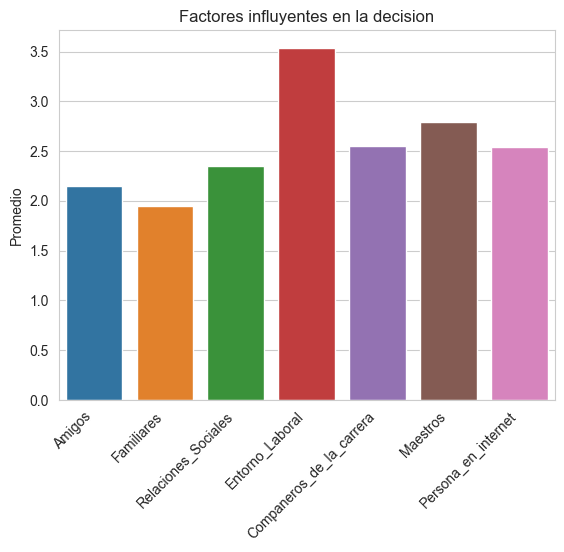

In [19]:
factores_influyentes = df.loc[:, 'Amigos':'Persona_en_internet']
# Grafica con las medias de las respuestas
ax = sns.barplot(data=factores_influyentes, errorbar=None)
ax.set_title('Factores influyentes en la decision')
ax.set_ylabel('Promedio')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, 'Situacion_financiera_actual'),
 Text(1, 0, 'Expectativa_mejor_situacion_financiera'),
 Text(2, 0, 'Salarios_area_especializacion'),
 Text(3, 0, 'Costos_estudios_en_area_especializacion')]

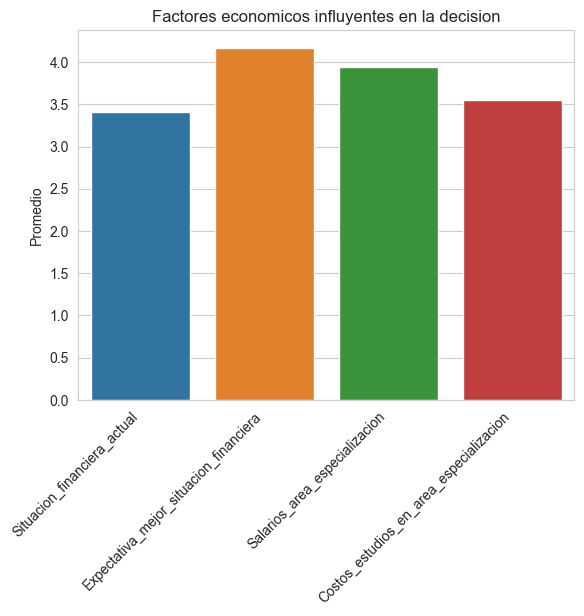

In [20]:
factores_influyentes = df.loc[:, 'Situacion_financiera_actual':'Costos_estudios_en_area_especializacion']
# Grafica con las medias de las respuestas
ax = sns.barplot(data=factores_influyentes, errorbar=None)
ax.set_title('Factores economicos influyentes en la decision')
ax.set_ylabel('Promedio')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

Text(0.5, 0, 'Rango salarial')

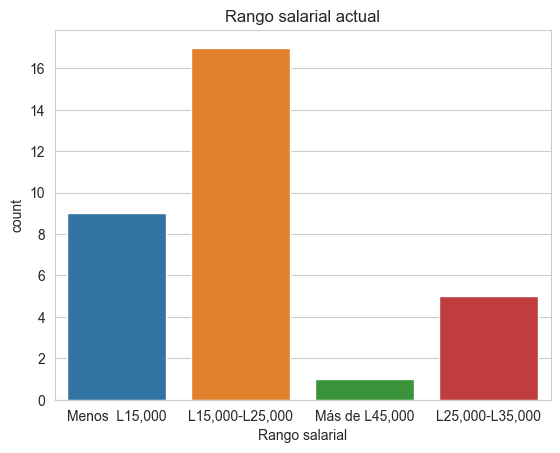

In [21]:
ax = sns.countplot(x='Rango_salarial_actual', data=trabajadores)
ax.set_title('Rango salarial actual')
ax.set_xlabel('Rango salarial')

[Text(0, 0, 'Soporte tecnico'),
 Text(1, 0, 'Desarrollo Backend'),
 Text(2, 0, 'Full stack'),
 Text(3, 0, 'Desarrollo en general '),
 Text(4, 0, 'Ciberseguridad'),
 Text(5, 0, 'Analista de datos'),
 Text(6, 0, 'Redes'),
 Text(7, 0, 'Desarrollo móvil'),
 Text(8, 0, 'Desarrollo Front-end'),
 Text(9, 0, 'Infraestructura'),
 Text(10, 0, 'Auditor de Sistemas '),
 Text(11, 0, 'Administración de bases de datos')]

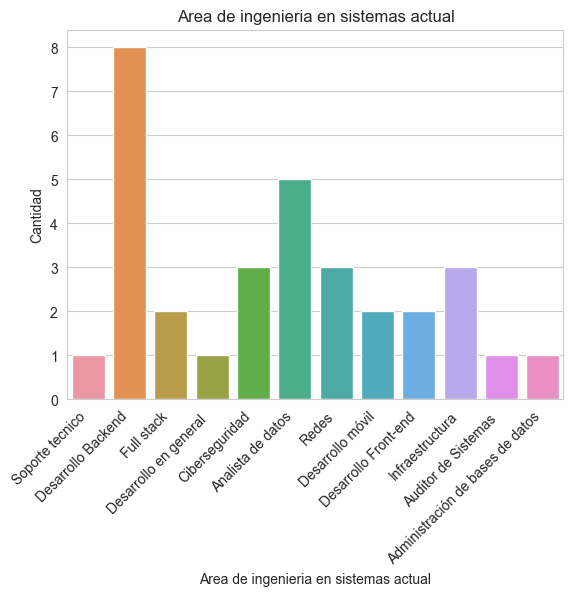

In [22]:
ax = sns.countplot(x='Area_de_ingenieria_en_sistemas_actual', data=trabajadores)
ax.set_title('Area de ingenieria en sistemas actual')
ax.set_xlabel('Area de ingenieria en sistemas actual')
ax.set_ylabel('Cantidad')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


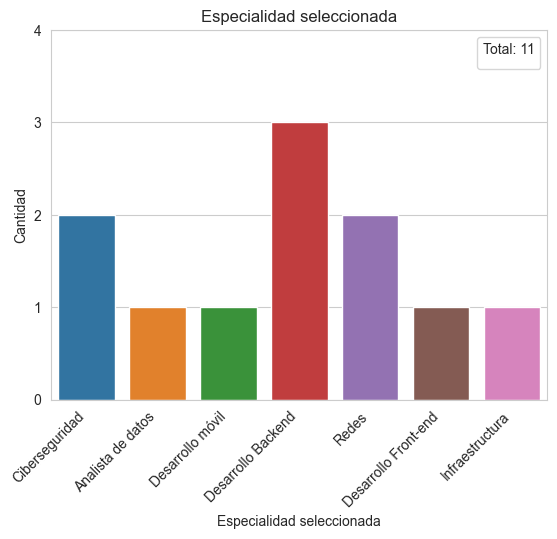

In [23]:
# Grafico de los trabajadores que van a continuar con su especializacion

#  trabajadores con especialidad seleccionada
trabajadores_si = trabajadores[trabajadores['Especialidad_seleccionada_dentro_de_Ing_Sistemas'] == 'Sí']

# trabajadores cuya especialidad seleccionada es la misma que su area actual
trabajadores_si_misma_area = trabajadores_si[trabajadores_si['Area_de_ingenieria_en_sistemas_actual'] == trabajadores_si['Especialidad_seleccionada']]
# trabajadores cuya especialidad seleccionada es diferente que su area actual
trabajadores_si_diferente_area = trabajadores_si[trabajadores_si['Area_de_ingenieria_en_sistemas_actual'] != trabajadores_si['Especialidad_seleccionada']]

ax = sns.countplot(x='Especialidad_seleccionada', data=trabajadores_si_misma_area)
ax.set_title('Especialidad seleccionada')
ax.set_xlabel('Especialidad seleccionada')
ax.set_ylabel('Cantidad')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

total = len(trabajadores_si_misma_area)

ax.legend(title='Total: ' + str(total), loc='upper right')

ax.set_yticks(np.arange(0, 5, 1.0))

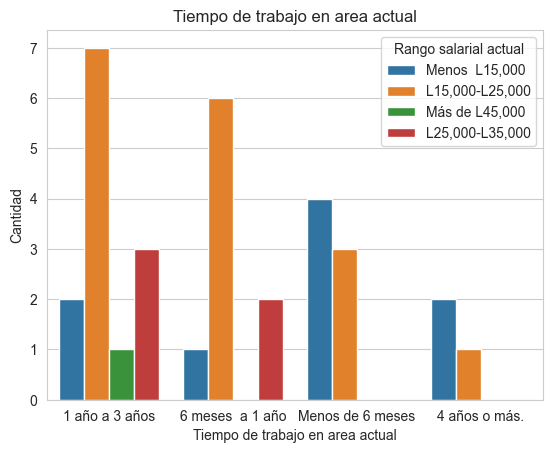

In [24]:
# grafico de experiencia y salario
ax = sns.countplot(x='Tiempo_de_trabajo_en_area_actual', data=trabajadores, hue='Rango_salarial_actual')

ax.set_title('Tiempo de trabajo en area actual')
ax.set_xlabel('Tiempo de trabajo en area actual')
ax.set_ylabel('Cantidad')
ax.legend(title='Rango salarial actual', loc='upper right')

In [25]:
# Primero separar todas las multiples opciones y contarlas en los Factores_influyentes_en_decision 
options_otras_areas = []
for index, row in df.iterrows():
    if type(row['Otras_areas_de_especializacion']) == str:
        options_otras_areas.extend(row['Otras_areas_de_especializacion'].split(','))
options_otras_areas = list(map(lambda x: x.strip(), options_otras_areas))
options_otras_areas = list(set(options_otras_areas))
options_otras_areas = list(filter(lambda x: x != '', options_otras_areas))

# Segundo contar las opciones en los Factores_influyentes_en_decision
options_count_otras_areas = {}
for option in options_otras_areas:
    options_count_otras_areas[option] = 0
for index, row in df.iterrows():
    if type(row['Otras_areas_de_especializacion']) == str:
        for option in options_otras_areas:
            if option in row['Otras_areas_de_especializacion']:
                options_count_otras_areas[option] += 1
options_count_otras_areas

{'Desarrollo móvil': 5,
 'Desarrollo Front-end': 11,
 'Administración de bases de datos': 10,
 'Analista de datos': 8,
 'Redes': 8,
 'Quality Assurance': 2,
 'Diseñador': 4,
 'Desarrollador de juegos': 4,
 'Infraestructura': 7,
 'Desarrollo Backend': 10,
 'Project Management': 6,
 'Ciberseguridad': 16}

[Text(0, 0, 'Desarrollo móvil'),
 Text(1, 0, 'Desarrollo Front-end'),
 Text(2, 0, 'Administración de bases de datos'),
 Text(3, 0, 'Analista de datos'),
 Text(4, 0, 'Redes'),
 Text(5, 0, 'Quality Assurance'),
 Text(6, 0, 'Diseñador'),
 Text(7, 0, 'Desarrollador de juegos'),
 Text(8, 0, 'Infraestructura'),
 Text(9, 0, 'Desarrollo Backend'),
 Text(10, 0, 'Project Management'),
 Text(11, 0, 'Ciberseguridad')]

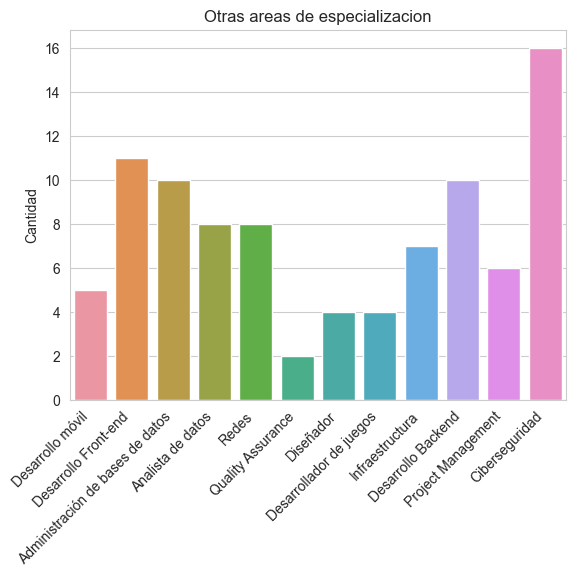

In [26]:
# Crear un grafico de barras con los resultados ordenados
ax = sns.barplot(x=list(options_count_otras_areas.keys()), y=list(options_count_otras_areas.values()))
ax.set_title('Otras areas de especializacion')
ax.set_ylabel('Cantidad')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

In [37]:
# Rango salarial por especialidad
# Primero sacamos el promedio de cada rango salarial por especialidad
rangos_salariales_por_especialidad = {}
especialidades = trabajadores['Especialidad_seleccionada'].unique()
especialidades = list(filter(lambda x: type(x) == str, especialidades))
rangos_salariales = trabajadores['Rango_salarial_actual'].unique()
for especialidad in especialidades:
    rangos_salariales_por_especialidad[especialidad] = {}
    for rango_salarial in rangos_salariales:
        rangos_salariales_por_especialidad[especialidad][rango_salarial] = 0
for index, row in trabajadores.iterrows():
    if type(row['Especialidad_seleccionada']) == str:
        rangos_salariales_por_especialidad[row['Especialidad_seleccionada']][row['Rango_salarial_actual']] += 1
for especialidad in especialidades:
    salario = 0
    cantidad = 0
    for rango_salarial in rangos_salariales:
        salario += rangos_salariales_por_especialidad[especialidad][rango_salarial] * int(rango_salarial.split('L').pop().replace(',', ''))
        cantidad += rangos_salariales_por_especialidad[especialidad][rango_salarial]
    rangos_salariales_por_especialidad[especialidad] = salario / cantidad
rangos_salariales_por_especialidad


{'Ciberseguridad': 23333.333333333332,
 'Desarrollo web y móvil ': 15000.0,
 'Desarrollo Backend': 32500.0,
 'Redes': 21666.666666666668,
 'Analista de datos': 25000.0,
 'Desarrollo móvil': 35000.0,
 'Desarrollo Front-end': 25000.0,
 'Project Management': 25000.0,
 'Infraestructura': 20000.0}

[Text(0, 0, 'Ciberseguridad'),
 Text(1, 0, 'Desarrollo web y móvil '),
 Text(2, 0, 'Desarrollo Backend'),
 Text(3, 0, 'Redes'),
 Text(4, 0, 'Analista de datos'),
 Text(5, 0, 'Desarrollo móvil'),
 Text(6, 0, 'Desarrollo Front-end'),
 Text(7, 0, 'Project Management'),
 Text(8, 0, 'Infraestructura')]

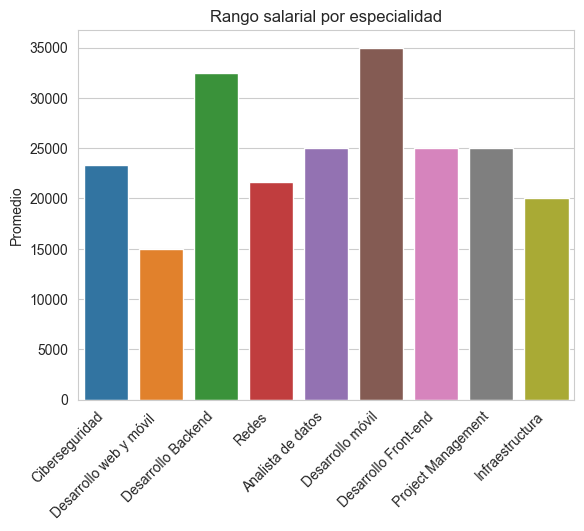

In [39]:
ax = sns.barplot(x=list(rangos_salariales_por_especialidad.keys()), y=list(rangos_salariales_por_especialidad.values()))
ax.set_title('Rango salarial por especialidad')
ax.set_ylabel('Promedio')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

Text(0.5, 1.0, 'Tiempo de trabajo en area actual')

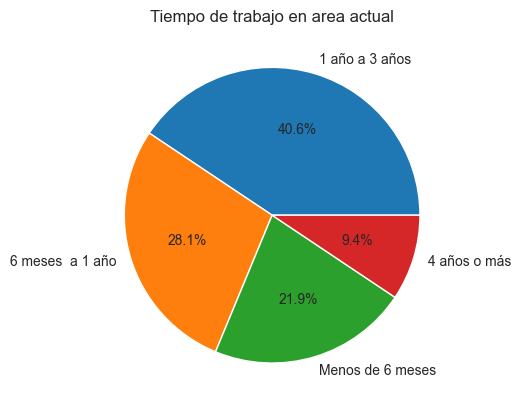

In [47]:
ax = plt.pie(trabajadores['Tiempo_de_trabajo_en_area_actual'].value_counts(), labels=['1 año a 3 años', '6 meses  a 1 año', 'Menos de 6 meses', '4 años o más'], autopct='%1.1f%%')
plt.title('Tiempo de trabajo en area actual')


[Text(0, 0, 'Soporte tecnico'),
 Text(1, 0, 'Desarrollo Backend'),
 Text(2, 0, 'Full stack'),
 Text(3, 0, 'Desarrollo en general '),
 Text(4, 0, 'Ciberseguridad'),
 Text(5, 0, 'Analista de datos'),
 Text(6, 0, 'Redes'),
 Text(7, 0, 'Desarrollo móvil'),
 Text(8, 0, 'Desarrollo Front-end'),
 Text(9, 0, 'Infraestructura'),
 Text(10, 0, 'Auditor de Sistemas '),
 Text(11, 0, 'Administración de bases de datos')]

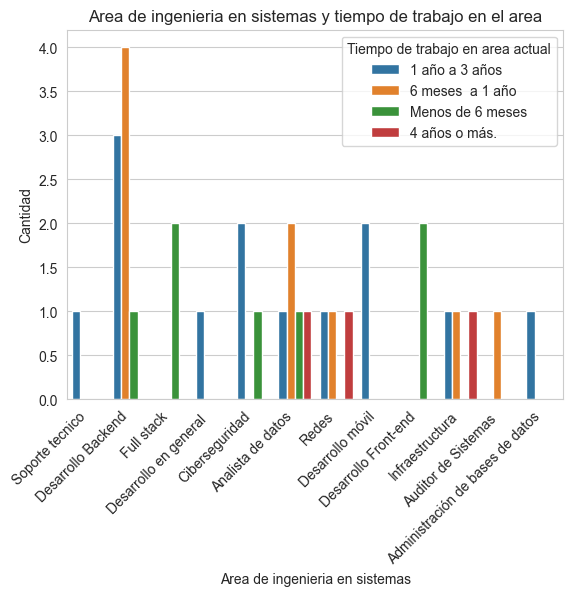

In [52]:
# Tiempo y area de trabajo actual
ax = sns.countplot(x='Area_de_ingenieria_en_sistemas_actual', data=trabajadores, hue='Tiempo_de_trabajo_en_area_actual')

ax.set_title('Area de ingenieria en sistemas y tiempo de trabajo en el area')
ax.set_xlabel('Area de ingenieria en sistemas')
ax.set_ylabel('Cantidad')
ax.legend(title='Tiempo de trabajo en area actual', loc='upper right')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')